# Using `K-means` for image compression


Clustering can be used for image compression. The scheme is surprisingly simple: similar, adjacent colors should be combined into one color. Let's do it ourselves. You will work with the following image.

Read the image from your individual assignment.

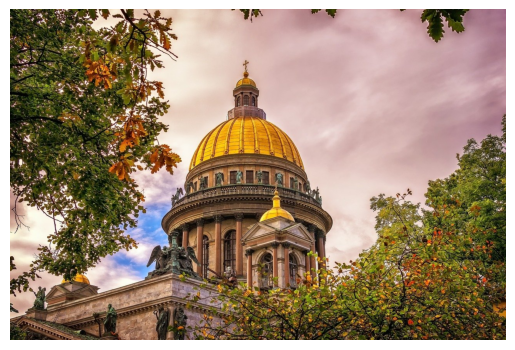

In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Путь к изображению
img_path = 'spb_st_isaacs.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

The image shown is a three-channel (RGB) image. Calculate the average pixel intensity across all channels.

In [14]:
average_intensity = np.mean(img)

print(f"Average pixel intensity across all channels: {average_intensity}")

Average pixel intensity across all channels: 123.05771846912856


Normalize pixel intensity values by dividing all values by $255$. Calculate the average value of pixel intensity for all channels after the transformation has been done.

In [16]:
img_normalized = img / 255.0
average_intensity_norm = np.mean(img_normalized)
print(f"Average normalized pixel intensity across all channels: {average_intensity_norm}")

Average normalized pixel intensity across all channels: 0.48257928811422945


Let's make sure that the original color space with about $16$ million possible states ($256^3$) is too large, and its dimensionality can be reduced. For clarity, let's build only some subsamples of dependencies of intensity values and only on a random subset of pixels.

"Straighten" the image so that <code>.shape</code> of the corresponding array has the following form <code>(height * width, 3)</code>.

In [21]:
# The function takes as input a "straightened" array corresponding to the image

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

Shape of the straightened image: (1091840, 3), image shape (853, 1280, 3)


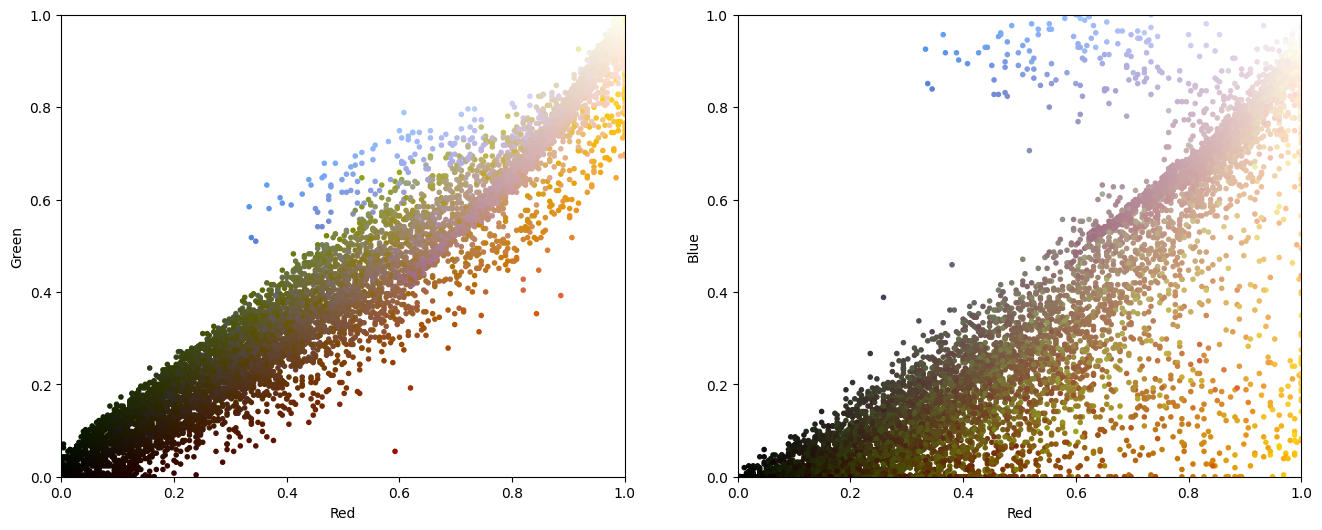

In [25]:
height, width, _ = img_normalized.shape
img_straightened = img_normalized.reshape(height * width, 3)
print(f"Shape of the straightened image: {img_straightened.shape}, image shape {img.shape}")
plot_pixels(img_straightened)

Let's transform $16$ million possibilities into just $16$ possibilities by using <code>K-means</code>. To speed up the algorithm, we'll use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code></a> on batches (subsets of the dataset). We'll see if this spoils the result.

Train the <code>MiniBatchKMeans</code> model on a normalized and "straightened" image with the parameters specified in your assignment.

In the image, replace the color values of each pixel with the coordinate values of the centroid of the cluster to which the pixel was assigned. Plot color dependency graphs using <code>plot_pixels()</code> with the new palette (the parameter <code>colors</code>).

In [34]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=16, random_state=14)
model.fit(img_straightened)

# Get cluster assignments
cluster_labels = model.predict(img_straightened)

# Get the cluster centers
cluster_centers = model.cluster_centers_

# Replace pixel color values with their cluster center
img_segmented = cluster_centers[cluster_labels].reshape(height, width, 3)

(853, 1280, 3)

Calculate the average pixel intensity value of the resulting image.

Average pixel intensity of the resulting image: 0.4821883618419982


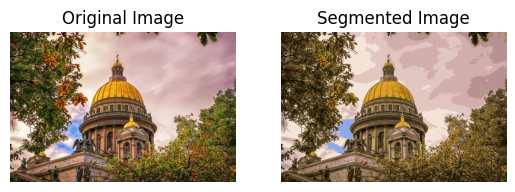

In [32]:
# Calculate average pixel intensity of the segmented image
average_intensity = np.mean(img_segmented)


print(f"Average pixel intensity of the resulting image: {average_intensity}")

# Display original and the segmented image
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(img_segmented)
plt.title("Segmented Image")

plt.show()

Enter the image number that corresponds to the $16$ color palette.

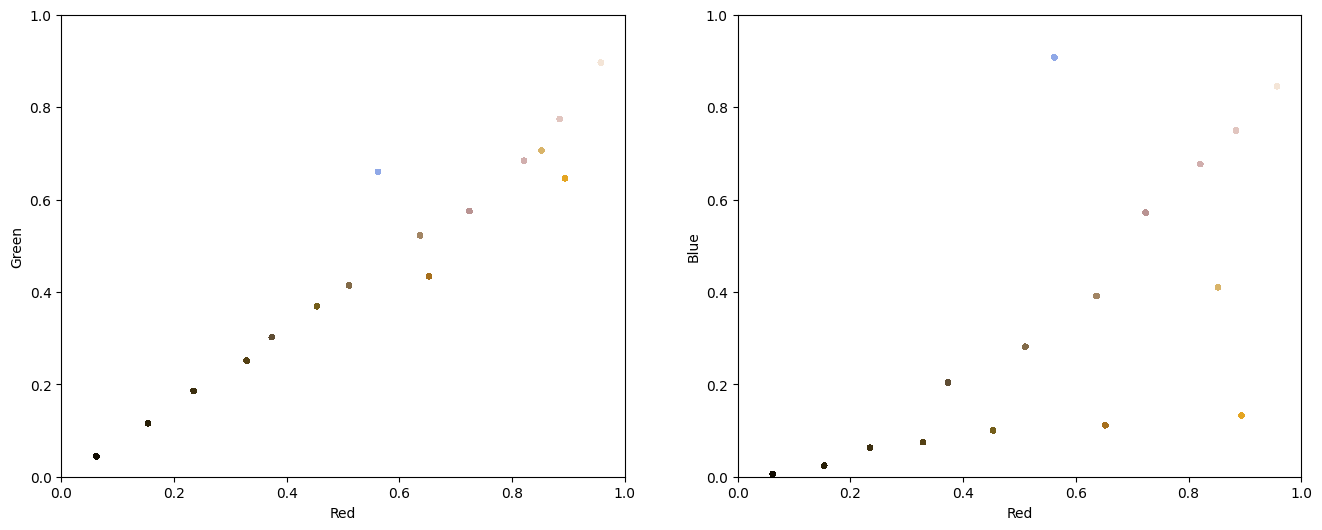

In [36]:
height_s, width_s, _ = img_segmented.shape
img_straightened_s = img_segmented.reshape(height * width, 3)
plot_pixels(img_straightened_s)

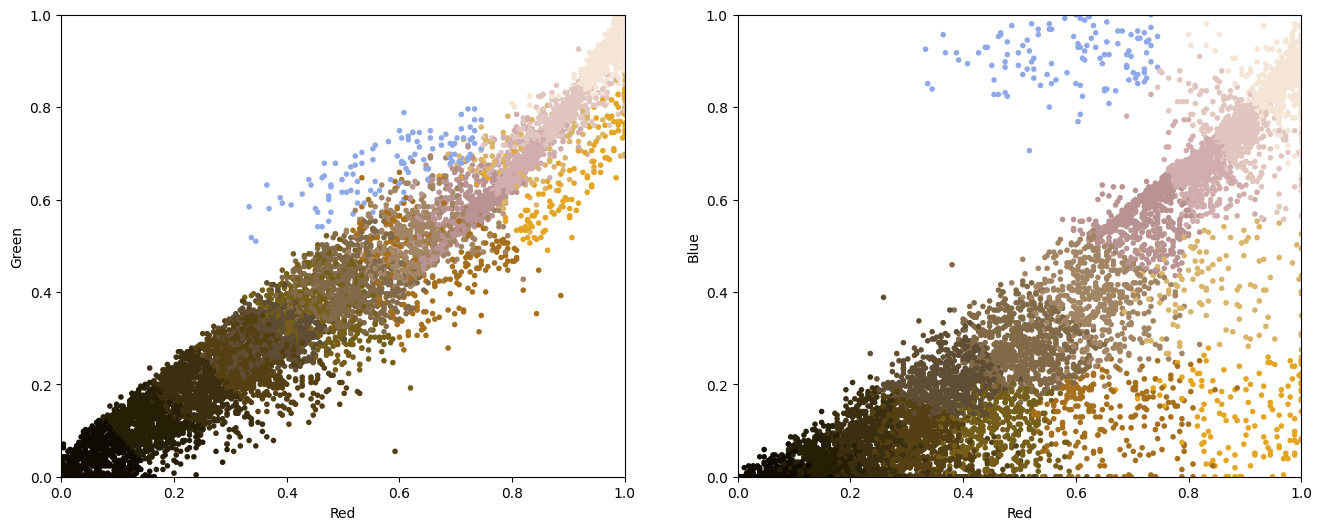

In [38]:
plot_pixels(img_straightened, img_straightened_s)

Construct an image of size $4 \times 4$ based on the $16$ colors obtained. Select the correct image.

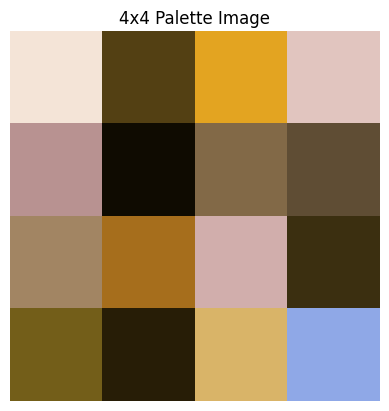

In [39]:
# Create an image of size 4x4 with cluster center colors
palette_image = cluster_centers.reshape(4, 4, 3)


# Display the 4x4 image
plt.axis('off')
plt.imshow(palette_image)
plt.title("4x4 Palette Image")
plt.show()

It's time to look at the result! Line up next to the original image and an image that uses only $16$ of colors.

In [ ]:
# < ENTER YOUR CODE HERE > 